In [31]:
import wfdb
import numpy as np
import neurokit2 as nk
import os
import os.path as osp
from wfdb import rdrecord


In [32]:
## first, read the MLII signal, get the peak name, location

In [33]:
MIT_DIR = 'mit-bih'


In [34]:
sig_names = list(map(lambda x: x.split('.')[0],filter(lambda x: x.endswith('.dat'), os.listdir(MIT_DIR))))


In [35]:
sig_names.sort(key=lambda x: int(x))


In [36]:
print(sig_names)


['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


In [37]:
record = rdrecord(osp.join(MIT_DIR, sig_names[0]))
ann = wfdb.rdann(osp.join(MIT_DIR, sig_names[0]), 'atr')


In [38]:
record.sig_name


['MLII', 'V5']

In [39]:
sig_names_with_mlii = []

for sig_name in sig_names:
    record = rdrecord(osp.join(MIT_DIR, sig_name))
    if 'MLII' in record.sig_name:
        sig_names_with_mlii.append((sig_name, record.sig_name.index('MLII')))


In [40]:
sig_names_with_mlii


[('100', 0),
 ('101', 0),
 ('103', 0),
 ('105', 0),
 ('106', 0),
 ('107', 0),
 ('108', 0),
 ('109', 0),
 ('111', 0),
 ('112', 0),
 ('113', 0),
 ('114', 1),
 ('115', 0),
 ('116', 0),
 ('117', 0),
 ('118', 0),
 ('119', 0),
 ('121', 0),
 ('122', 0),
 ('123', 0),
 ('124', 0),
 ('200', 0),
 ('201', 0),
 ('202', 0),
 ('203', 0),
 ('205', 0),
 ('207', 0),
 ('208', 0),
 ('209', 0),
 ('210', 0),
 ('212', 0),
 ('213', 0),
 ('214', 0),
 ('215', 0),
 ('217', 0),
 ('219', 0),
 ('220', 0),
 ('221', 0),
 ('222', 0),
 ('223', 0),
 ('228', 0),
 ('230', 0),
 ('231', 0),
 ('232', 0),
 ('233', 0),
 ('234', 0)]

In [41]:
OUT_DIR = 'processed_data'

# voi moi signal, lay cac dinh, tu dinh se co 2 limit 2 ben, la 2 dinh kia,

record = rdrecord(osp.join(MIT_DIR, sig_names_with_mlii[0][0]))
sig = record.p_signal[:, sig_names_with_mlii[0][1]]


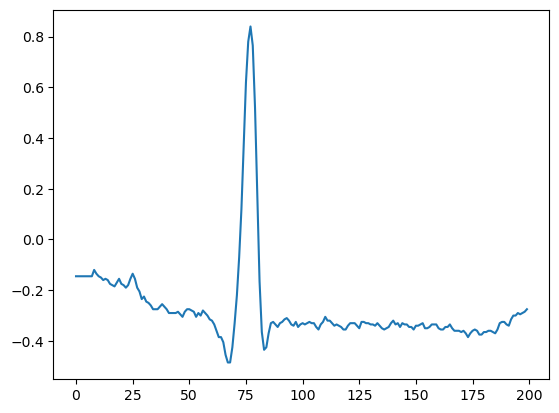

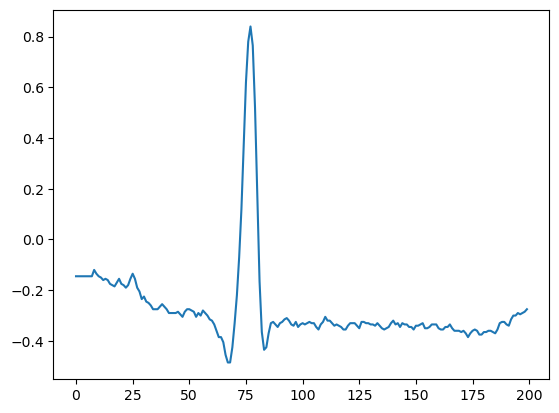

In [55]:
import matplotlib.pyplot as plt
plt.plot(sig[:200])


In [43]:
ann = wfdb.rdann(osp.join(MIT_DIR, sig_names_with_mlii[0][0]), 'atr')


In [44]:
_, rpeaks = nk.ecg_process(sig, sampling_rate=360)


In [45]:
rpeaks_detected = rpeaks['ECG_R_Peaks']
rpeaks_true = ann.sample


In [46]:
peak_pairs = []
miss_peaks = []
for idx in range(len(rpeaks_true[:-1])):
    curr_range = rpeaks_true[idx:idx+3]
    detected_peaks_in_range = rpeaks_detected[(curr_range[0]<rpeaks_detected) & (rpeaks_detected<curr_range[-1])]
    if len(detected_peaks_in_range) > 0:
        peak_pairs.append((curr_range[1], detected_peaks_in_range[0]))
    else:
        miss_peaks.append(curr_range[1])


In [47]:
peak_pairs

[(370, 370),
 (662, 662),
 (946, 946),
 (1231, 1231),
 (1515, 1515),
 (1809, 1809),
 (2044, 2092),
 (2402, 2092),
 (2706, 2686),
 (2998, 2997),
 (3282, 3278),
 (3560, 3559),
 (3862, 3862),
 (4170, 4170),
 (4466, 4465),
 (4764, 4764),
 (5060, 5060),
 (5346, 5346),
 (5633, 5633),
 (5918, 5918),
 (6214, 6214),
 (6527, 6527),
 (6823, 6823),
 (7106, 7106),
 (7391, 7391),
 (7670, 7669),
 (7953, 7953),
 (8245, 8245),
 (8539, 8539),
 (8837, 8837),
 (9141, 9141),
 (9431, 9431),
 (9710, 9710),
 (9998, 9998),
 (10282, 10282),
 (10591, 10591),
 (10894, 10894),
 (11191, 11191),
 (11480, 11480),
 (11781, 11780),
 (12066, 12066),
 (12350, 12350),
 (12645, 12644),
 (12949, 12949),
 (13266, 13266),
 (13562, 13562),
 (13842, 13842),
 (14131, 14131),
 (14423, 14422),
 (14710, 14710),
 (15011, 15011),
 (15310, 15310),
 (15607, 15607),
 (15899, 15899),
 (16183, 16183),
 (16464, 16464),
 (16755, 16755),
 (17058, 17058),
 (17358, 17358),
 (17657, 17657),
 (17947, 17946),
 (18227, 18227),
 (18514, 18514),
 (1

In [48]:
# mat 2 peak dau, coi nhu bo qua, k tinh
miss_peaks


[77, 649991]

In [49]:
miss_peaks = miss_peaks[1:-1]


In [50]:
pairs = np.stack(peak_pairs)
abs_err_list = np.abs(pairs[:, 0] - pairs[:, 1])
abs_err_list


array([0, 0, 0, ..., 1, 0, 1])

In [51]:
pairs

array([[   370,    370],
       [   662,    662],
       [   946,    946],
       ...,
       [649232, 649231],
       [649484, 649484],
       [649734, 649733]])

In [52]:
np.sum(abs_err_list<10)

2114

In [53]:
mas=np.average(abs_err_list)
mas


13.299867899603699